In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
import scipy.stats as stat
from scipy.stats import norm
from matplotlib import pylab
from scipy.special import boxcox1p

In [42]:
df = pd.read_csv('data.csv')

In [43]:
df.head(10)

,cid,sim_content,sim_comment,word_count,duplicate_word_ratio,no_of_sentences,length_of_comment,num_of_punctuations,is_period_sequence,post_coment_gap,black_word_count,is_link,is_youtube_link,is_number,comment_duplication,is_spam
0,Ugy769vKgLmxLndJ8sx4AaABAg,0.192186,0.261949,9,0.000000,1,47,0,0,4939.0,0.111111,0,0,0,0.0,0
1,UgwIQMX2rs9U9qI06_N4AaABAg,0.159259,0.197398,9,0.000000,2,59,2,0,5334059.0,0.000000,0,0,0,0.0,0
2,UgwCIdg5Z-jirXS6Kgl4AaABAg,0.178539,0.206151,16,0.062500,4,90,4,0,2146094.0,0.125000,1,1,0,0.0,1
3,UgwZsA5gVoDLrZeMRBl4AaABAg,0.249048,0.235316,7,0.000000,1,37,0,0,1391963.0,0.000000,0,0,0,0.0,0
4,UgxoAeJzzamd3kqBpiF4AaABAg,0.109326,0.131638,13,0.000000,2,79,4,1,1362914.0,0.076923,1,1,0,0.0,1
5,UgzhuoMY1sduEDFhMUR4AaABAg,0.282432,0.276514,11,0.000000,1,71,0,0,1192759.0,0.000000,0,0,0,0.0,0
6,Ugw28zxbqUdVXr44Vl14AaABAg,0.226357,0.243827,8,0.000000,1,48,0,0,1122930.0,0.000000,0,0,0,0.0,0
7,UgzktBpWcom6t3fXDbN4AaABAg,0.351830,0.309095,11,0.000000,1,60,0,0,964083.0,0.090909,0,0,0,0.0,0
8,UgyG6JKLqM16YwgEO594AaABAg,0.085271,0.111130,4,0.000000,1,21,1,0,942642.0,0.000000,0,0,0,0.0,1
9,Ugwj8hjhp0CiaZew_gR4AaABAg,0.480824,0.427070,56,0.214286,4,322,1,1,908922.0,0.035714,0,0,0,0.0,0


In [44]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6967 entries, 0 to 6966
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cid                   6967 non-null   object 
 1   sim_content           6967 non-null   float64
 2   sim_comment           6967 non-null   float64
 3   word_count            6967 non-null   int64  
 4   duplicate_word_ratio  6967 non-null   float64
 5   no_of_sentences       6967 non-null   int64  
 6   length_of_comment     6967 non-null   int64  
 7   num_of_punctuations   6967 non-null   int64  
 8   is_period_sequence    6967 non-null   int64  
 9   post_coment_gap       6967 non-null   float64
 10  black_word_count      6967 non-null   float64
 11  is_link               6967 non-null   int64  
 12  is_youtube_link       6967 non-null   int64  
 13  is_number             6967 non-null   int64  
 14  comment_duplication   6967 non-null   float64
 15  is_spam              

In [5]:
# all of features are in float and int data types and no missing values

<AxesSubplot:>

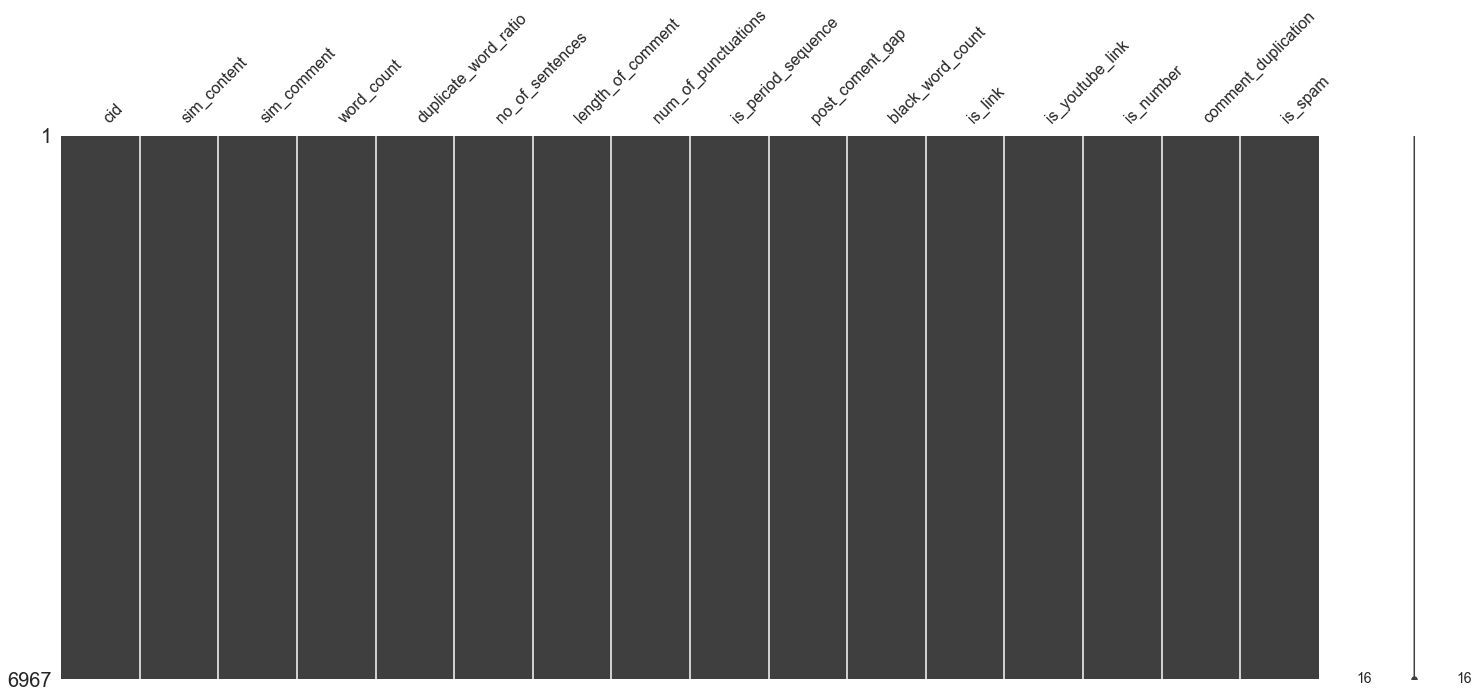

In [45]:
msn.matrix(df)

In [46]:
df.columns

Index(['cid', 'sim_content', 'sim_comment', 'word_count',
       'duplicate_word_ratio', 'no_of_sentences', 'length_of_comment',
       'num_of_punctuations', 'is_period_sequence', 'post_coment_gap',
       'black_word_count', 'is_link', 'is_youtube_link', 'is_number',
       'comment_duplication', 'is_spam'],
      dtype='object')

In [47]:
continous_features = [x for x in df.columns if df[x].dtypes == 'float64']

In [48]:
continous_features

['sim_content',
 'sim_comment',
 'duplicate_word_ratio',
 'post_coment_gap',
 'black_word_count',
 'comment_duplication']

In [49]:
discrete_features = [x for x in df.columns if df[x].dtypes == 'int64']

In [50]:
discrete_features

['word_count',
 'no_of_sentences',
 'length_of_comment',
 'num_of_punctuations',
 'is_period_sequence',
 'is_link',
 'is_youtube_link',
 'is_number',
 'is_spam']

In [51]:
df1 = df[['sim_content', 'sim_comment', 'word_count',
       'duplicate_word_ratio', 'no_of_sentences', 'length_of_comment',
       'num_of_punctuations', 'is_period_sequence', 
       'post_coment_gap', 'black_word_count', 'is_link', 'is_youtube_link',
       'is_number',  'comment_duplication', 'is_spam']]

In [52]:
df1['is_spam'].value_counts()

0    6255
1     712
Name: is_spam, dtype: int64

### Handle Outliers

In [53]:
df2 = df.copy()

In [15]:
# 'sim_content'

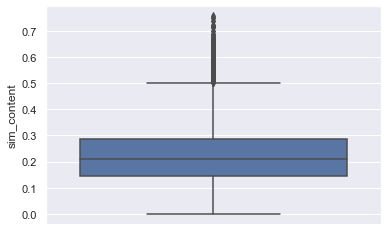

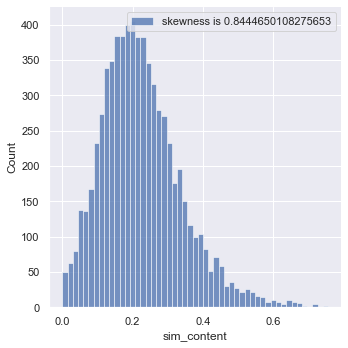

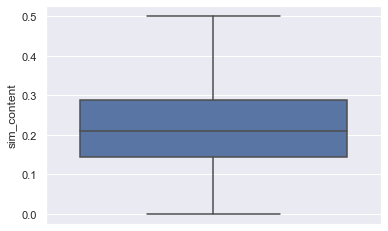

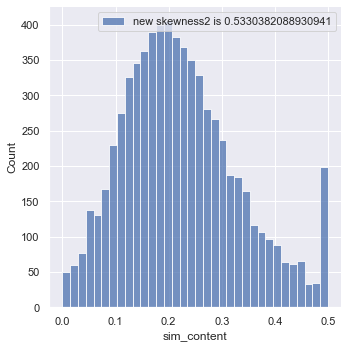

In [54]:
sns.set_theme(style='darkgrid')
sns.boxplot(y=df2['sim_content'])
plt.show()
sns.displot( data=df2['sim_content'],label="skewness is {}".format(df2['sim_content'].skew()))
plt.legend(loc='best')
plt.show()


#x = df2['sim_content'].quantile(0.1)
y = df2['sim_content'].quantile(0.975)
#df2['sim_content']= np.where(df2['sim_content'] < x,  x,df2['sim_content'])
df2['sim_content']= np.where(df2['sim_content'] > y,  y,df2['sim_content'])


sns.boxplot(y=df2['sim_content'])
plt.show()
sns.displot(data=df2['sim_content'],label="new skewness2 is {}".format(df2['sim_content'].skew()))
plt.legend(loc='best')
plt.show()

In [55]:
# 'sim_comment'
df3 = df2.copy()


In [56]:
y = df3['sim_comment'].quantile(0.982)

In [57]:
y

0.5445295334916176

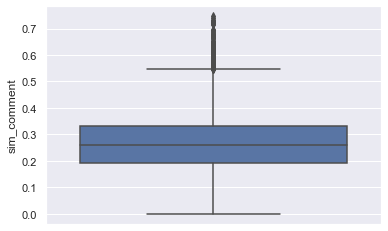

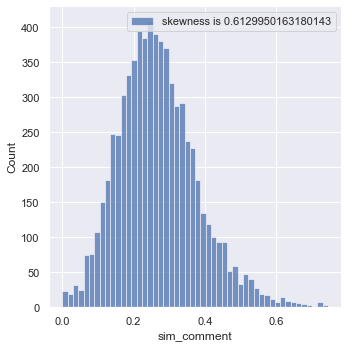

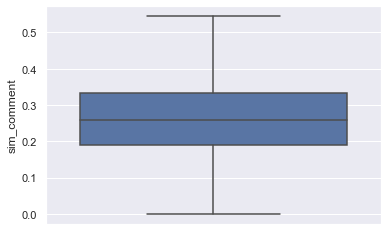

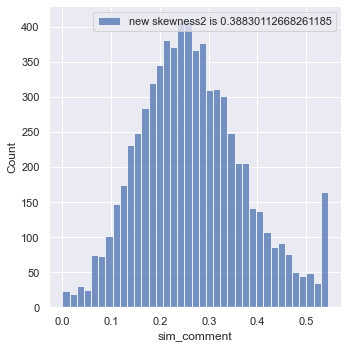

In [58]:
sns.set_theme(style='darkgrid')
sns.boxplot(y=df3['sim_comment'])
plt.show()
sns.displot( data=df3['sim_comment'],label="skewness is {}".format(df3['sim_comment'].skew()))
plt.legend(loc='best')
plt.show()


#x = df3['sin_comment'].quantile(0.03)
y = df3['sim_comment'].quantile(0.982)
#df3['sin_comment']= np.where(df3['sin_comment'] < x,  x,df3['sin_comment'])
df3['sim_comment']= np.where(df3['sim_comment'] > y,  y,df3['sim_comment'])


sns.boxplot(y=df3['sim_comment'])
plt.show()
sns.displot(data=df3['sim_comment'],label="new skewness2 is {}".format(df3['sim_comment'].skew()))
plt.legend(loc='best')
plt.show()

In [59]:
# 'word_count'
df4 = df3.copy()

In [60]:
y = df4['word_count'].quantile(0.94)

In [61]:
y

42.0

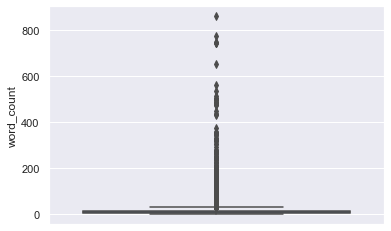

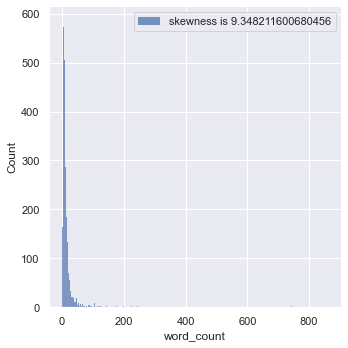

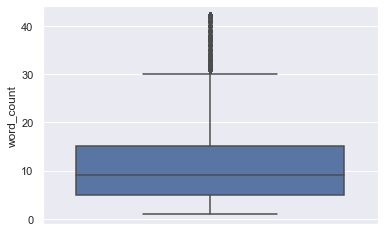

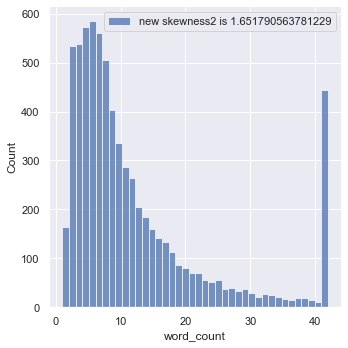

In [62]:
sns.set_theme(style='darkgrid')
sns.boxplot(y=df4['word_count'])
plt.show()
sns.displot( data=df4['word_count'],label="skewness is {}".format(df4['word_count'].skew()))
plt.legend(loc='best')
plt.show()


#x = df2['word_count'].quantile(0.1)
y = df4['word_count'].quantile(0.94)
#df2['word_count']= np.where(df2['word_count'] < x,  x,df2['word_count'])
df4['word_count']= np.where(df4['word_count'] > y,  y,df4['word_count'])


sns.boxplot(y=df4['word_count'])
plt.show()
sns.displot(data=df4['word_count'],label="new skewness2 is {}".format(df4['word_count'].skew()))
plt.legend(loc='best')
plt.show()

In [21]:
#df4 = df4.drop(df4[df4['word_count']>40].index)

In [22]:
#df4[df4['word_count']>40].index

In [63]:
df4['is_spam'].value_counts()

0    6255
1     712
Name: is_spam, dtype: int64

In [64]:
# 'duplicate_word_ratio'
df5 = df4.copy()

In [25]:
#we can not ignore spam comments duplicate words ratio high fact .so i think it is better we keep this without handle

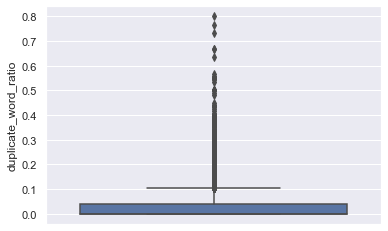

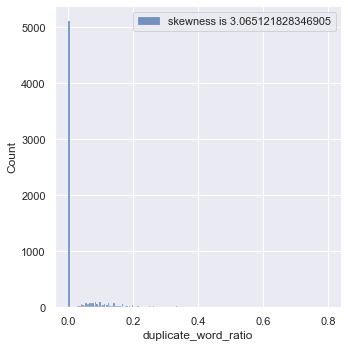

In [65]:
sns.set_theme(style='darkgrid')
sns.boxplot(y=df5['duplicate_word_ratio'])
plt.show()
sns.displot( data=df5['duplicate_word_ratio'],label="skewness is {}".format(df5['duplicate_word_ratio'].skew()))
plt.legend(loc='best')
plt.show()


#x = df2['duplicate_word_ratio'].quantile(0.1)
#y = df5['duplicate_word_ratio'].quantile(0.95)
#df2['duplicate_word_ratiot']= np.where(df2['duplicate_word_ratio'] < x,  x,df2['duplicate_word_ratio'])
#df5['duplicate_word_ratio']= np.where(df5['duplicate_word_ratio'] > y,  y,df5['duplicate_word_ratio'])


#sns.boxplot(y=df5['duplicate_word_ratio'])
#plt.show()
#sns.displot(data=df5['duplicate_word_ratio'],label="new skewness2 is {}".format(df5['duplicate_word_ratio'].skew()))
#plt.legend(loc='best')
#plt.show()

In [66]:
# 'no_of_sentences'
df6 = df5.copy()

In [67]:
df6['no_of_sentences'].value_counts()

1     5320
2      706
3      299
4      171
5      129
6       58
7       39
8       37
10      27
9       21
11      21
12      20
13      10
20       9
14       8
18       8
16       7
19       6
15       6
17       6
23       5
31       5
28       4
70       4
24       4
22       3
30       3
74       3
36       3
73       2
21       2
38       2
39       2
25       2
90       1
27       1
47       1
93       1
66       1
46       1
61       1
41       1
33       1
29       1
96       1
72       1
68       1
40       1
59       1
Name: no_of_sentences, dtype: int64

In [68]:
df6['no_of_sentences'] = np.where(df6['no_of_sentences']>3,3,df6['no_of_sentences'])

In [69]:
df6['no_of_sentences'].value_counts()

1    5320
3     941
2     706
Name: no_of_sentences, dtype: int64

<AxesSubplot:xlabel='no_of_sentences'>

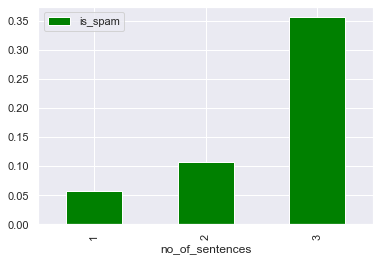

In [70]:
pd.pivot_table(data=df6, index=['no_of_sentences'], values=['is_spam'], aggfunc='mean').plot(kind='bar',color='green')

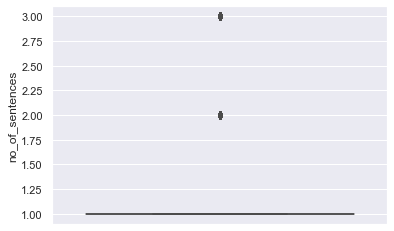

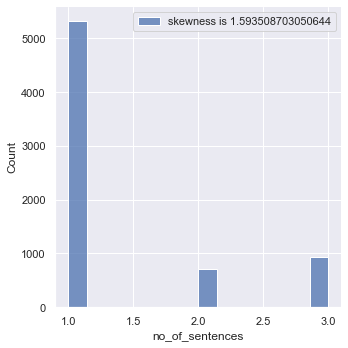

In [71]:
sns.set_theme(style='darkgrid')
sns.boxplot(y=df6['no_of_sentences'])
plt.show()
sns.displot( data=df6['no_of_sentences'],label="skewness is {}".format(df6['no_of_sentences'].skew()))
plt.legend(loc='best')
plt.show()


#x = df6['no_of_sentences'].quantile(0.1)
#y = df6['no_of_sentences'].quantile(0.7)
#df6['no_of_sentences']= np.where(df6['no_of_sentences'] < x,  x,df6['no_of_sentences'])
#df6['no_of_sentences']= np.where(df6['no_of_sentences'] > y,  y,df6['no_of_sentences'])


#sns.boxplot(y=df6['no_of_sentences'])
#plt.show()
#sns.displot(data=df6['no_of_sentences'],label="new skewness2 is {}".format(df6['no_of_sentences'].skew()))
#plt.legend(loc='best')
#plt.show()

In [73]:
# 'length_of_comment'
df7 = df6.copy()

In [74]:
y = df7['length_of_comment'].quantile(0.9)

In [75]:
y

165.40000000000055

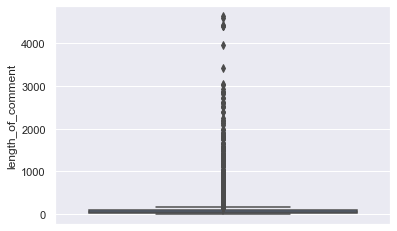

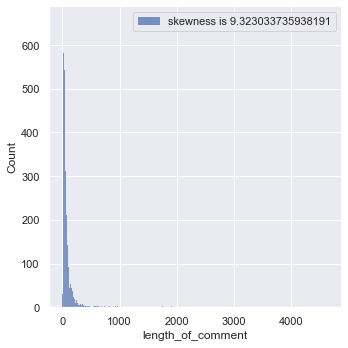

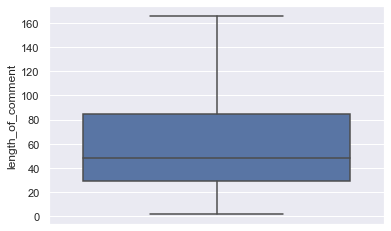

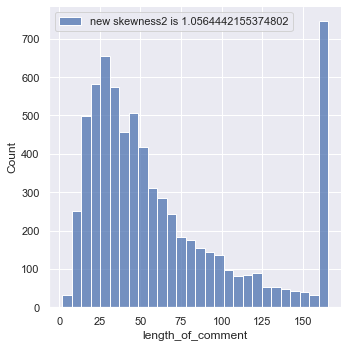

In [76]:
sns.set_theme(style='darkgrid')
sns.boxplot(y=df7['length_of_comment'])
plt.show()
sns.displot( data=df7['length_of_comment'],label="skewness is {}".format(df7['length_of_comment'].skew()))
plt.legend(loc='best')
plt.show()


#x = df7['length_of_comment'].quantile(0.1)
y = df7['length_of_comment'].quantile(0.9)
#df7['length_of_comment']= np.where(df7['length_of_comment'] < x,  x,df7['length_of_comment'])
df7['length_of_comment']= np.where(df7['length_of_comment'] > y,  y,df7['length_of_comment'])


sns.boxplot(y=df7['length_of_comment'])
plt.show()
sns.displot(data=df7['length_of_comment'],label="new skewness2 is {}".format(df7['length_of_comment'].skew()))
plt.legend(loc='best')
plt.show()

In [78]:
# 'num_of_punctuations'
df8 = df7.copy()

In [79]:
y = df8['num_of_punctuations'].quantile(0.99)

In [80]:
y

31.0

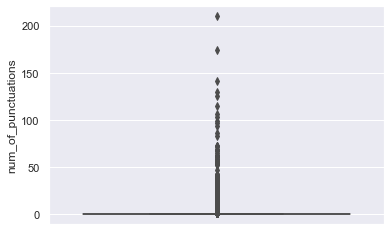

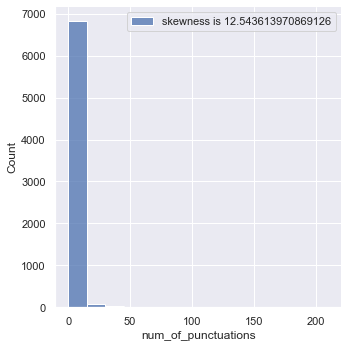

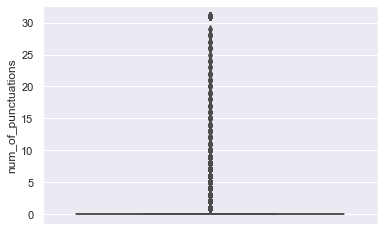

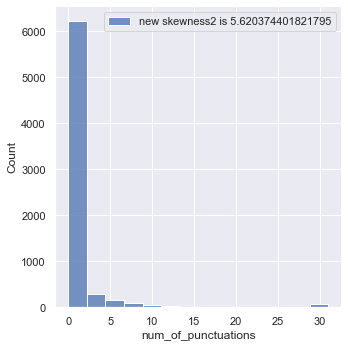

In [81]:
sns.set_theme(style='darkgrid')
sns.boxplot(y=df8['num_of_punctuations'])
plt.show()
sns.displot( data=df8['num_of_punctuations'],label="skewness is {}".format(df8['num_of_punctuations'].skew()))
plt.legend(loc='best')
plt.show()


#x = df8['num_of_punctuations'].quantile(0.1)
y = df8['num_of_punctuations'].quantile(0.99)
#df8['num_of_punctuations']= np.where(df8['num_of_punctuationst'] < x,  x,df8['num_of_punctuations'])
df8['num_of_punctuations']= np.where(df8['num_of_punctuations'] > y,  y,df8['num_of_punctuations'])


sns.boxplot(y=df8['num_of_punctuations'])
plt.show()
sns.displot(data=df8['num_of_punctuations'],label="new skewness2 is {}".format(df8['num_of_punctuations'].skew()))
plt.legend(loc='best')
plt.show()

In [37]:
# we can make this as a categoricl feature

In [82]:
df8['num_of_punctuations'].value_counts()

0.0     5281
1.0      694
2.0      248
4.0      152
3.0      135
5.0      100
31.0      75
6.0       52
8.0       44
7.0       43
9.0       24
10.0      16
13.0      11
11.0       9
12.0       9
14.0       8
15.0       8
22.0       7
28.0       6
19.0       6
21.0       5
26.0       5
16.0       5
17.0       5
24.0       4
20.0       4
18.0       4
27.0       3
23.0       2
25.0       1
29.0       1
Name: num_of_punctuations, dtype: int64

In [83]:
df8['num_of_punctuations'] = np.where(df8['num_of_punctuations']>6,6,df8['num_of_punctuations'])

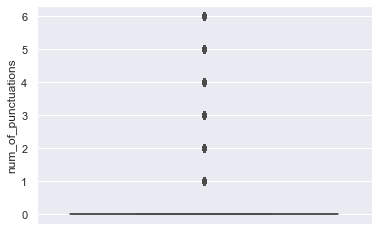

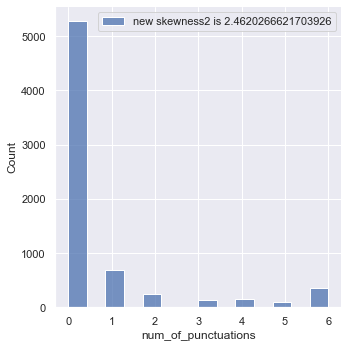

In [84]:
sns.boxplot(y=df8['num_of_punctuations'])
plt.show()
sns.displot(data=df8['num_of_punctuations'],label="new skewness2 is {}".format(df8['num_of_punctuations'].skew()))
plt.legend(loc='best')
plt.show()

<AxesSubplot:xlabel='num_of_punctuations'>

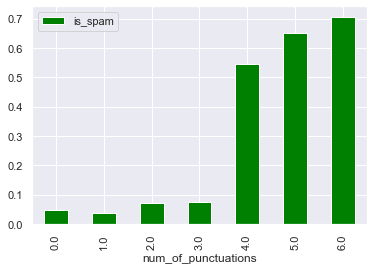

In [85]:
pd.pivot_table(data=df8, index=['num_of_punctuations'],values=['is_spam'], aggfunc='mean').plot(kind='bar',color='green')

In [42]:
# 'stop_word_ratio'
#df9 = df8.copy()

In [43]:
'''
sns.set_theme(style='darkgrid')
sns.boxplot(y=df9['stop_word_ratio'])
plt.show()
sns.displot( data=df9['stop_word_ratio'],label="skewness is {}".format(df9['stop_word_ratio'].skew()))
plt.legend(loc='best')
plt.show()


#x = df9['stop_word_ratio'].quantile(0.1)
y = df9['stop_word_ratio'].quantile(0.92)
#df9['stop_word_ratio']= np.where(df9['stop_word_ratio'] < x,  x,df9['stop_word_ratio'])
df9['stop_word_ratio']= np.where(df9['stop_word_ratio'] > y,  y,df9['stop_word_ratio'])


sns.boxplot(y=df9['stop_word_ratio'])
plt.show()
sns.displot(data=df9['stop_word_ratio'],label="new skewness2 is {}".format(df9['stop_word_ratio'].skew()))
plt.legend(loc='best')
plt.show()
'''

'\nsns.set_theme(style=\'darkgrid\')\nsns.boxplot(y=df9[\'stop_word_ratio\'])\nplt.show()\nsns.displot( data=df9[\'stop_word_ratio\'],label="skewness is {}".format(df9[\'stop_word_ratio\'].skew()))\nplt.legend(loc=\'best\')\nplt.show()\n\n\n#x = df9[\'stop_word_ratio\'].quantile(0.1)\ny = df9[\'stop_word_ratio\'].quantile(0.92)\n#df9[\'stop_word_ratio\']= np.where(df9[\'stop_word_ratio\'] < x,  x,df9[\'stop_word_ratio\'])\ndf9[\'stop_word_ratio\']= np.where(df9[\'stop_word_ratio\'] > y,  y,df9[\'stop_word_ratio\'])\n\n\nsns.boxplot(y=df9[\'stop_word_ratio\'])\nplt.show()\nsns.displot(data=df9[\'stop_word_ratio\'],label="new skewness2 is {}".format(df9[\'stop_word_ratio\'].skew()))\nplt.legend(loc=\'best\')\nplt.show()\n'

In [92]:
# 'post_coment_gap'
#df10 = df9.copy()
df10 = df8.copy()

In [93]:
y = df10['post_coment_gap'].quantile(0.8)

In [94]:
y

584487.0

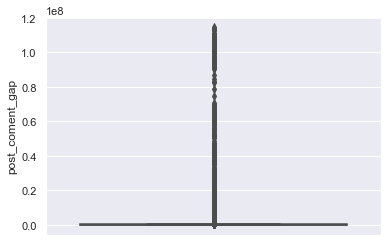

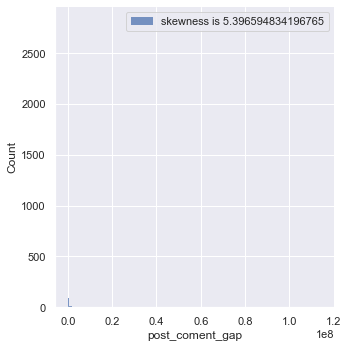

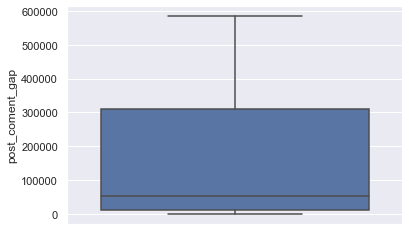

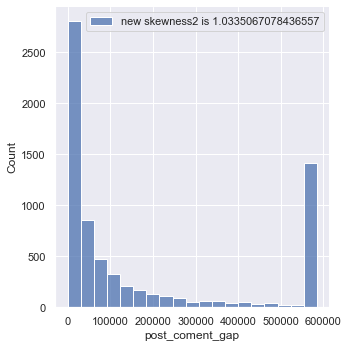

In [95]:
sns.set_theme(style='darkgrid')
sns.boxplot(y=df10['post_coment_gap'])
plt.show()
sns.displot( data=df10['post_coment_gap'],label="skewness is {}".format(df10['post_coment_gap'].skew()))
plt.legend(loc='best')
plt.show()


#x = df10['post_coment_gap'].quantile(0.1)
y = df10['post_coment_gap'].quantile(0.80)
#df10['post_coment_gap']= np.where(df10['post_coment_gap'] < x,  x,df10['post_coment_gap'])
df10['post_coment_gap']= np.where(df10['post_coment_gap'] > y,  y,df10['post_coment_gap'])


sns.boxplot(y=df10['post_coment_gap'])
plt.show()
sns.displot(data=df10['post_coment_gap'],label="new skewness2 is {}".format(df10['post_coment_gap'].skew()))
plt.legend(loc='best')
plt.show()

In [100]:
# 'black_word_ratio'
df11 = df10.copy()

In [101]:
y = df11['black_word_count'].quantile(1)

In [102]:
y

1.0

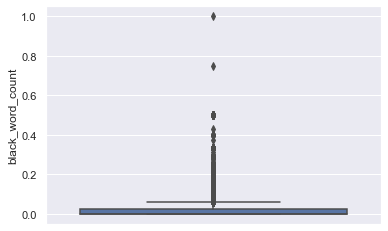

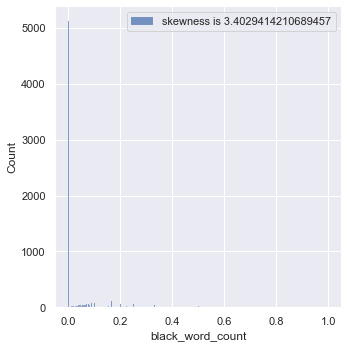

In [103]:
sns.set_theme(style='darkgrid')
sns.boxplot(y=df11['black_word_count'])
plt.show()
sns.displot( data=df11['black_word_count'],label="skewness is {}".format(df11['black_word_count'].skew()))
plt.legend(loc='best')
plt.show()


#x = df10['post_coment_gap'].quantile(0.1)
#y = df11['black_word_count'].quantile(0.99)
#df10['post_coment_gap']= np.where(df10['post_coment_gap'] < x,  x,df10['post_coment_gap'])
#df11['black_word_count']= np.where(df11['black_word_count'] > y,  y,df11['black_word_count'])


#sns.boxplot(y=df11['black_word_count'])
#plt.show()
#sns.displot(data=df11['black_word_count'],label="new skewness2 is {}".format(df11['black_word_count'].skew()))
#plt.legend(loc='best')
#plt.show()

In [48]:
# outliers handle in features 

In [49]:
#df1['num_of_punctuations'].value_counts().plot(kind='bar')

### find the realtionship between  features and target variable

#### 'word_count' vs 'classifier_val'

In [104]:
pd.pivot_table(df11, index = ['is_spam'], values = ['word_count'] ,aggfunc='mean') 

,word_count
is_spam,
0,11.167706
1,23.068820


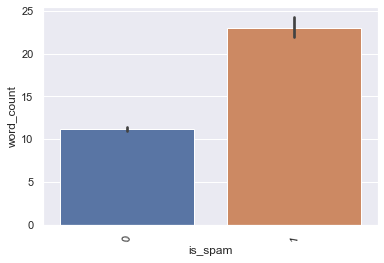

In [105]:
sns.barplot(data = df11,x='is_spam', y ='word_count' )
plt.xticks(rotation=80)
plt.show()

In [52]:
#class_1 = df11.groupby('classifier_val').get_group(1)
#class_0 = df11.groupby('classifier_val').get_group(0)


<AxesSubplot:xlabel='word_count', ylabel='is_spam'>

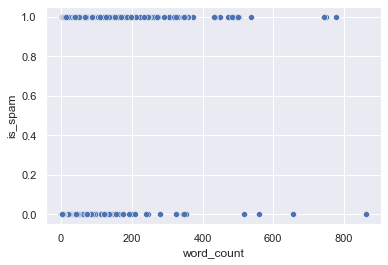

In [106]:
sns.scatterplot(data=df, x='word_count',y='is_spam')

In [54]:
# we can see when increase the number of words, the probability of being a spam also going to high

#### 'no_of_sentences' vs 'classifier_val'

In [107]:
pd.pivot_table(data=df11, index=['is_spam'], values=['no_of_sentences'], aggfunc='mean')

,no_of_sentences
is_spam,
0,1.294644
1,2.046348


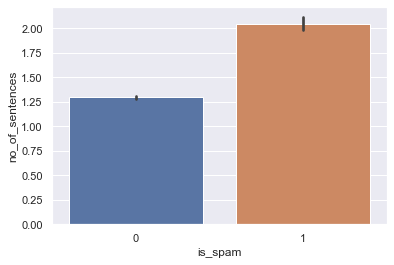

In [108]:
sns.barplot(data=df11, x='is_spam',y='no_of_sentences')
plt.show()

<AxesSubplot:xlabel='no_of_sentences', ylabel='is_spam'>

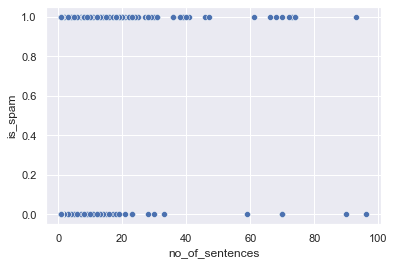

In [109]:
sns.scatterplot(data=df, x='no_of_sentences',y='is_spam')

In [58]:
# we can see when increase the number of sentences ,probabiliy of being a spam also going to high

#### 'length_of_comment' vs 'classifier_val'

In [110]:
pd.pivot_table(data=df11, index=['is_spam'], values=['length_of_comment'], aggfunc='mean')

,length_of_comment
is_spam,
0,58.869193
1,109.897472


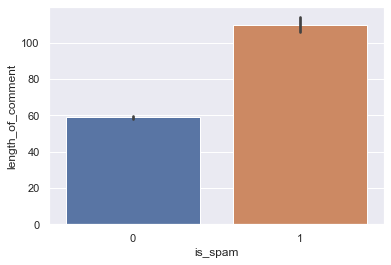

In [111]:
sns.barplot(data=df11, x='is_spam', y='length_of_comment')
plt.show()

<AxesSubplot:xlabel='length_of_comment', ylabel='is_spam'>

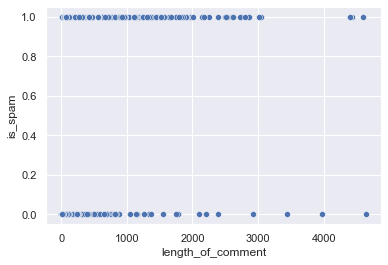

In [112]:
sns.scatterplot(data=df,x='length_of_comment',y='is_spam')

In [62]:
# we can see when increase the length of a comment ,the probability of being a spam also going to high

#### 'num_of_punctuations' vs 'classifier_val'

In [113]:
pd.pivot_table(data=df11, index=['is_spam'],values=['num_of_punctuations'],aggfunc='mean')

,num_of_punctuations
is_spam,
0,0.413110
1,3.175562


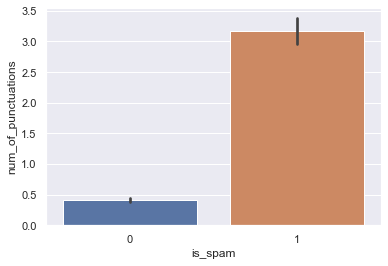

In [114]:
sns.barplot(data=df11, x='is_spam',y='num_of_punctuations')
plt.show()

<AxesSubplot:xlabel='num_of_punctuations', ylabel='is_spam'>

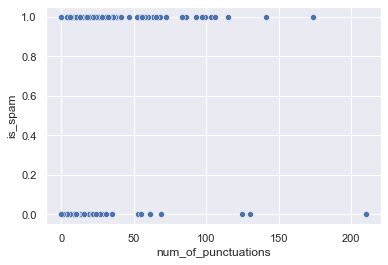

In [115]:
sns.scatterplot(data=df,x='num_of_punctuations',y='is_spam')

In [66]:
# we can see when increase the number of punctuations ,the probability of being a spam also going to high

#### 'is_period_sequence' vs 'classifier_val'

In [116]:
pd.pivot_table(data=df11, index=['is_period_sequence','is_spam'],values=['cid'],aggfunc='count')

cid
is_period_sequence is_spam      
0                  0        4836
                   1         512
1                  0        1419
                   1         200

In [117]:
group_from_dots = df11.groupby(['is_period_sequence'])

#get a data frame with period_sequence value == 1
dfs_dots = group_from_dots.get_group(1)

dfs_dots['is_spam'].value_counts()

0    1419
1     200
Name: is_spam, dtype: int64

In [118]:
from matplotlib import pyplot as plt
plt.style.use("fivethirtyeight")
filt = (dfs_dots['is_spam'] == 1)
spam = dfs_dots[filt]['is_period_sequence'].count()
filt = (dfs_dots['is_spam'] == 0)
ham = dfs_dots[filt]['is_period_sequence'].count()

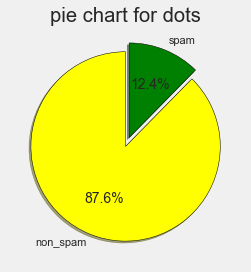

In [70]:
slices = [ham,spam]
labels = ['non_spam', 'spam']
colors = [ 'yellow','green',]
explode = [0,0.1]
plt.pie(slices, labels=labels, colors=colors, explode=explode, shadow=True,
        startangle=90, autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'})
plt.title("pie chart for dots")
#plt.savefig('dot_pie.png')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='is_period_sequence', ylabel='count'>

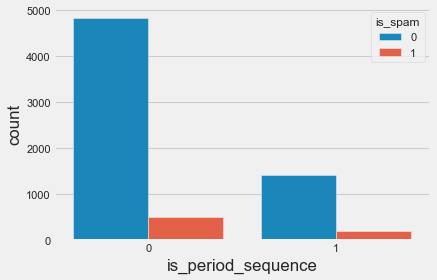

In [119]:
sns.countplot(x="is_period_sequence", data=df11,hue='is_spam')

In [72]:
# we can see when a comment has a sequance of dots ..it has a high probabality for being a ham comment

#### 'black_word_ratio' vs 'classifier_val'

In [120]:
pd.pivot_table(data=df11, index=['is_spam'],values=['black_word_count'],aggfunc='mean')

,black_word_count
is_spam,
0,0.021740
1,0.113634


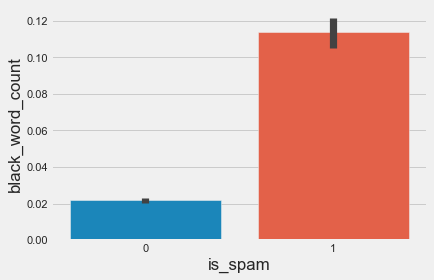

In [121]:
sns.barplot(data=df11, x='is_spam',y='black_word_count')
plt.show()

<AxesSubplot:xlabel='black_word_count', ylabel='is_spam'>

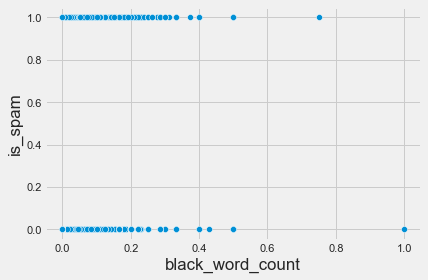

In [122]:
sns.scatterplot(data=df,x='black_word_count',y='is_spam')

In [76]:
# we can see spam comments have a high number of black words counts

#### 'is_link' vs 'classifier_val'

In [123]:
pd.pivot_table(data=df11, index=['is_spam','is_link'],values=['cid'],aggfunc='count')

cid
is_spam is_link      
0       0        6222
        1          33
1       0         355
        1         357

<AxesSubplot:xlabel='is_link', ylabel='count'>

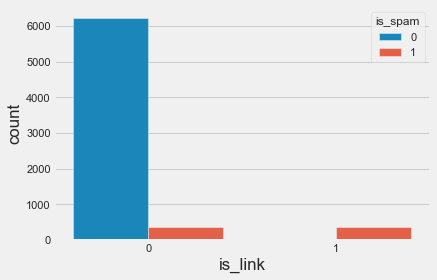

In [124]:
sns.countplot(x="is_link", data=df11,hue='is_spam')

In [79]:
# if a comment has a link then it has a high probability for being a spam comment

#### 'is_youtube_link' vs 'classifier_val'

In [125]:
pd.pivot_table(data=df11, index=['is_spam','is_youtube_link'],values=['cid'],aggfunc='count')

cid
is_spam is_youtube_link      
0       0                6228
        1                  27
1       0                 524
        1                 188

<AxesSubplot:xlabel='is_youtube_link', ylabel='count'>

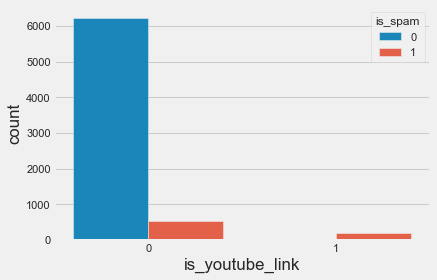

In [126]:
sns.countplot(x="is_youtube_link", data=df11,hue='is_spam')

In [82]:
# if a comment has a youtube link it has a high probability for being a spam comments

In [127]:
pd.pivot_table(data=df11, index=['is_link','is_youtube_link'], values=['cid',],columns=['is_spam'],aggfunc='count',margins=True)

cid           
is_spam                     0    1   All
is_link is_youtube_link                 
0       0                6222  355  6577
1       0                   6  169   175
        1                  27  188   215
All                      6255  712  6967

#### 'is_number' vs 'classifier_val'

In [128]:
pd.pivot_table(data=df11, index=['is_spam','is_number'],values=['cid'],aggfunc='count')

cid
is_spam is_number      
0       0          6250
        1             5
1       0           643
        1            69

<AxesSubplot:xlabel='is_number', ylabel='count'>

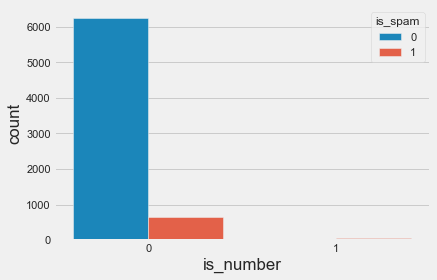

In [129]:
sns.countplot(x="is_number", data=df11,hue='is_spam')

In [86]:
# we can see when a comment has a phone number information then it has a high probability for being a spam

In [87]:
#pd.pivot_table(data=df11, index=['classifier_val','is_mail'],values=['com'],aggfunc='count')

In [88]:
#sns.countplot(x="is_mail", data=df11,hue='classifier_val')

In [89]:
# no mails in dataset 

In [90]:
#df11.corr()

### find the realtionship between continouse features and target variable

In [130]:
continous_features

['sim_content',
 'sim_comment',
 'duplicate_word_ratio',
 'post_coment_gap',
 'black_word_count',
 'comment_duplication']

In [131]:
pd.pivot_table(df11, index = 'is_spam', values = continous_features , aggfunc='mean' ,margins=True)

,black_word_count,comment_duplication,duplicate_word_ratio,post_coment_gap,sim_comment,sim_content
is_spam,,,,,,
0,0.021740,0.009281,0.028101,167530.866027,0.262812,0.217955
1,0.113634,0.184009,0.103274,274677.356742,0.304983,0.267231
All,0.031131,0.027138,0.035784,178480.815990,0.267121,0.222991


In [93]:
## sim_content

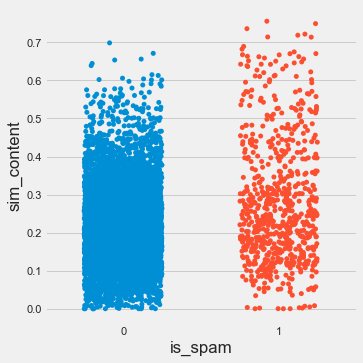

In [132]:
#sns.scatterplot(data=df, y='sim_content',x='classifier_val')
sns.catplot(data=df, y='sim_content',x='is_spam',jitter=0.25)
#plt.xticks(rotation=80)

In [95]:
# we can see lot of spam comments have in range 0.1 - 0.34
# Ham comments have 0.04 - 0.5 
# therefor usually ham comments have a better cos similerity with it's content

In [96]:
# sim_comment

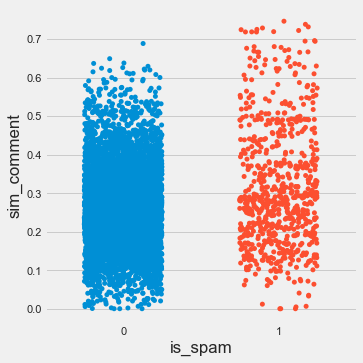

In [133]:
sns.catplot(data=df, y='sim_comment',x='is_spam',jitter=0.25)

In [98]:
# we can see lot of spam comments have in range 0.15 - 0.32
# Ham comments have 0.04 - 0.55 
# therefor usually ham comments have a better cos similerity with it's sourounding comments

In [99]:
# stop_word_ratio

In [100]:
#sns.catplot(data=df, y='stop_word_ratio',x='is_spam',jitter=0.25)

In [101]:
# spam comments have a low number of stop words ratio

In [102]:
# post_coment_gap

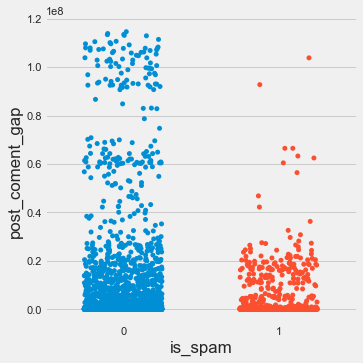

In [134]:
sns.catplot(data=df, y='post_coment_gap',x='is_spam',jitter=0.25)

In [104]:
# we can see lot of spam comments have in range 0.001 - 0.01
# Ham comments have 0.001 - 0. 2
# we can conclude spam comments have a high probability of having a less time gap of (post - comment)

In [105]:
# duplicate_word_ratio

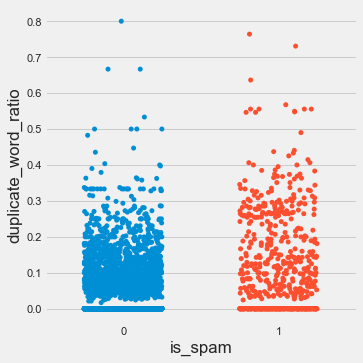

In [135]:
sns.catplot(data=df, y='duplicate_word_ratio',x='is_spam',jitter=0.25)

In [107]:
# ham comments -> 0 - 0.2
# spam comments -> it has a several areas 0 to 0.01 , 0.05 to 0.15 , 0.28 to 0.3

In [136]:
# black_word_ratio

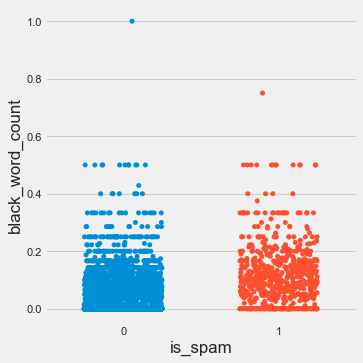

In [137]:
sns.catplot(data=df, y='black_word_count',x='is_spam',jitter=0.25)

In [110]:
# Feature correaltion

In [138]:
from scipy.stats import pearsonr
import numpy as np
rho = df11.corr()
pval = df11.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
rho.round(2).astype(str) + p


,sim_content,sim_comment,word_count,duplicate_word_ratio,no_of_sentences,length_of_comment,num_of_punctuations,is_period_sequence,post_coment_gap,black_word_count,is_link,is_youtube_link,is_number,comment_duplication,is_spam
sim_content,1.0***,0.88***,0.72***,0.38***,0.47***,0.74***,0.25***,0.17***,0.09***,0.13***,0.14***,-0.03***,0.16***,0.09***,0.14***
sim_comment,0.88***,1.0***,0.66***,0.36***,0.44***,0.67***,0.23***,0.18***,0.05***,0.1***,0.12***,-0.05***,0.16***,0.1***,0.12***
word_count,0.72***,0.66***,1.0***,0.63***,0.7***,0.96***,0.53***,0.22***,0.11***,0.12***,0.38***,0.16***,0.26***,0.18***,0.34***
duplicate_word_ratio,0.38***,0.36***,0.63***,1.0***,0.47***,0.57***,0.43***,0.15***,0.1***,0.12***,0.3***,0.09***,0.22***,0.17***,0.3***
no_of_sentences,0.47***,0.44***,0.7***,0.47***,1.0***,0.68***,0.46***,0.38***,0.09***,0.11***,0.37***,0.18***,0.21***,0.16***,0.32***
length_of_comment,0.74***,0.67***,0.96***,0.57***,0.68***,1.0***,0.49***,0.22***,0.09***,0.12***,0.36***,0.18***,0.21***,0.18***,0.33***
num_of_punctuations,0.25***,0.23***,0.53***,0.43***,0.46***,0.49***,1.0***,0.09***,0.15***,0.16***,0.73***,0.49***,0.31***,0.22***,0.53***
is_period_sequence,0.17***,0.18***,0.22***,0.15***,0.38***,0.22***,0.09***,1.0***,0.01,0.02**,0.06***,0.0,0.06***,-0.01,0.04***
post_coment_gap,0.09***,0.05***,0.11***,0.1***,0.09***,0.09***,0.15***,0.01,1.0***,0.09***,0.16***,0.02,0.15***,0.02,0.14***
black_word_count,0.13***,0.1***,0.12***,0.12***,0.11***,0.12***,0.16***,0.02**,0.09***,1.0***,0.19***,0.09***,0.11***,0.09***,0.4***


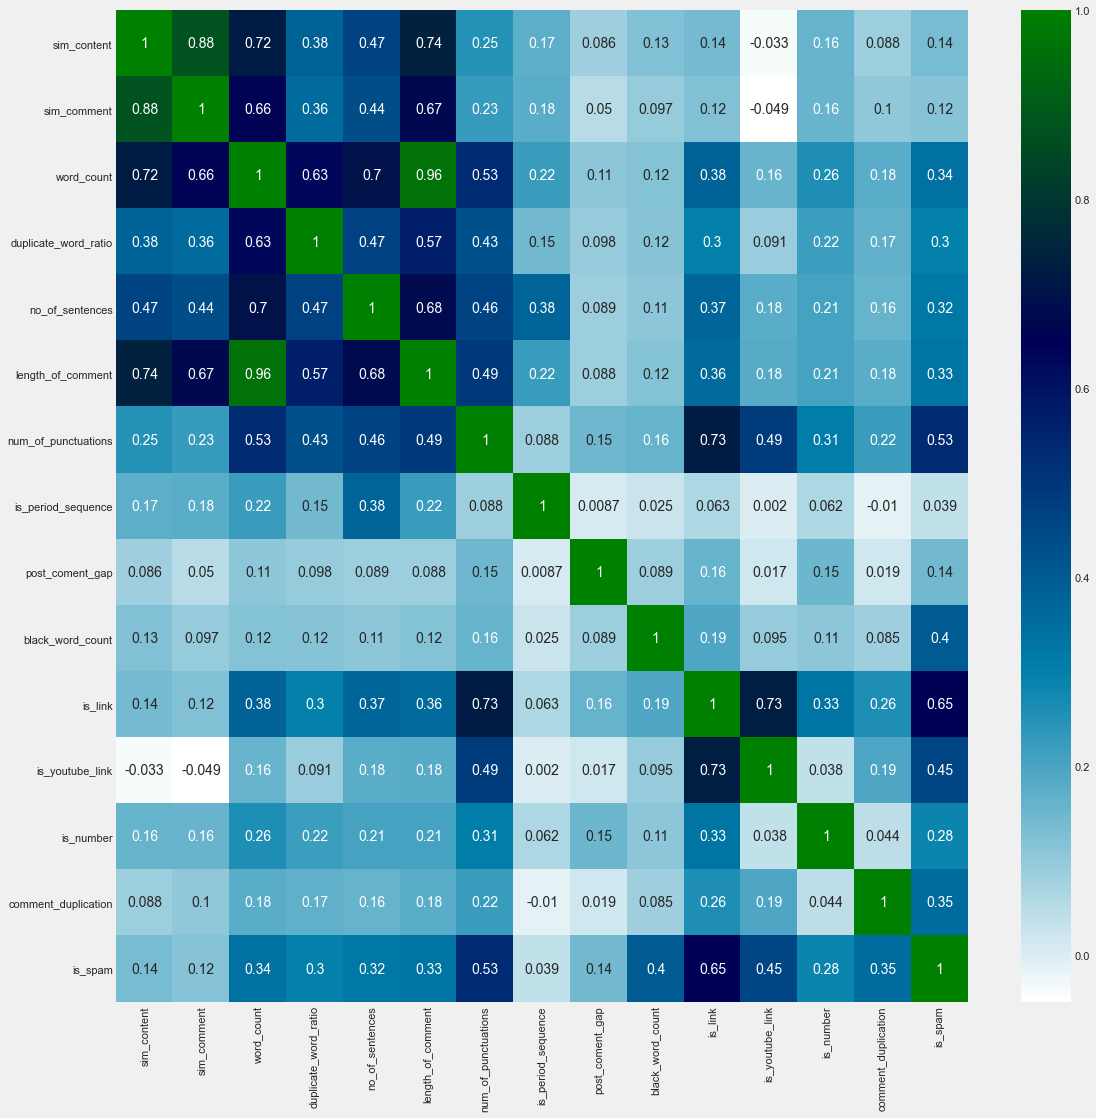

In [139]:
plt.figure(figsize=(17,17))
sns.heatmap(df11.corr(),annot=True,cmap='ocean_r')
plt.show()

### Data distribution

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


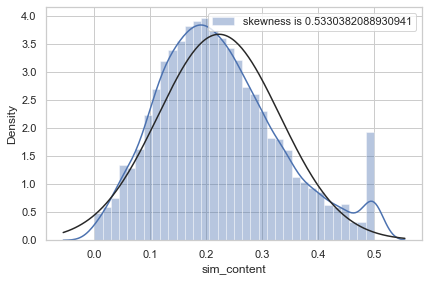

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


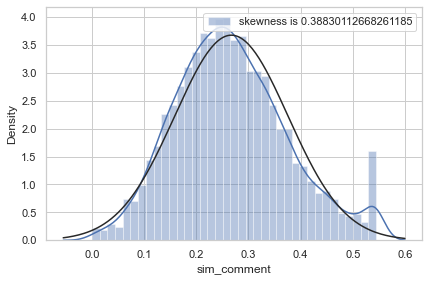

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


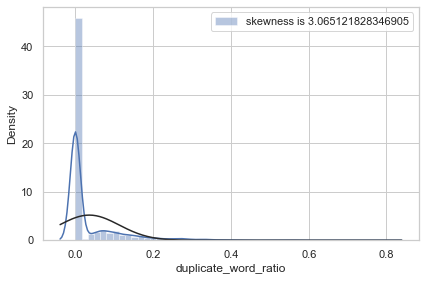

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


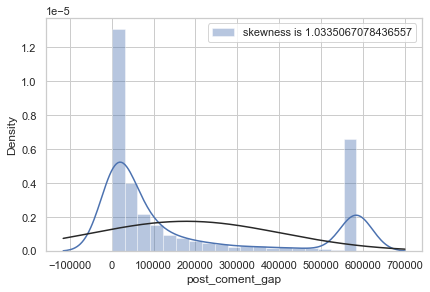

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


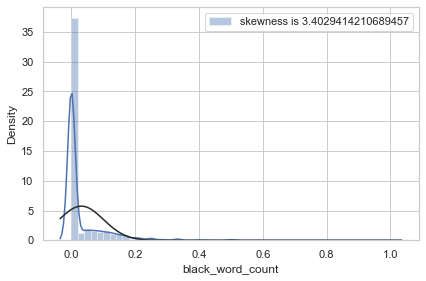

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


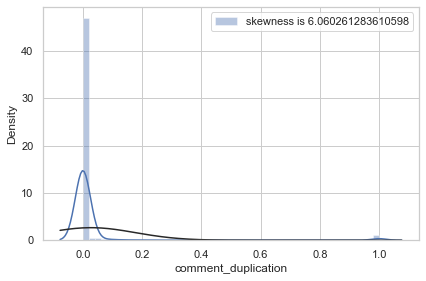

In [140]:
for x in continous_features:
    sns.set_theme(style='whitegrid')
    sns.distplot(df11[x],label="skewness is {}".format(df11[x].skew()),fit=norm)
    plt.legend(loc='best')
    plt.show()

### Data transformation

Here we gonna use few trnformation techniques to find the best one for each features

1) Logarithmic transformation <br>
2) Reciprocal transformation <br>
3) Square root transformation <br>
4) Exponential transformation (more general, you can use any exponent) <br>
5) Boxcox transformation <br>

 

In [141]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    print("skewness is {}".format(df[feature].skew()))
    sns.distplot(df[feature],label="skewness is {}".format(df[feature].skew()),fit=norm)
    plt.title(feature)
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.title(feature)
    plt.show()

In [142]:
# 'sim_content'
df12 = df11.copy()

skewness is 0.3165190656369744


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


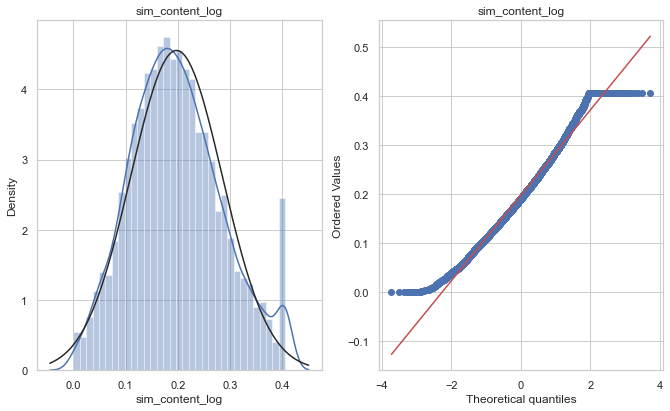

skewness is -0.2684315765909355


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


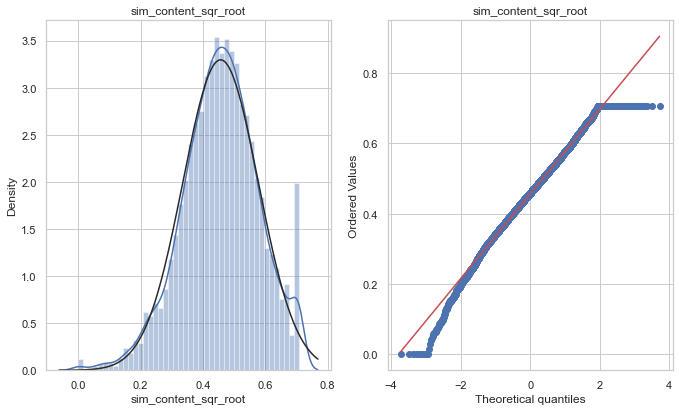

skewness is 1.563579734027326


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


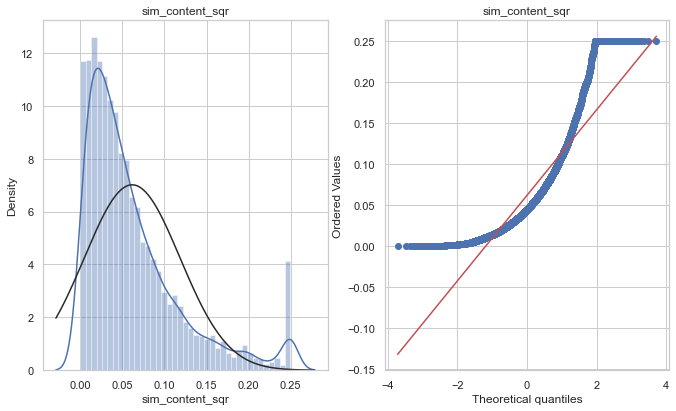

skewness is 0.30992952736952617


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


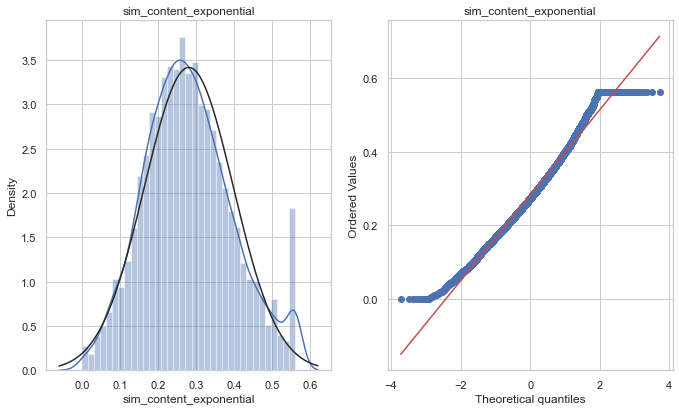

skewness is 0.3704793005558056


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


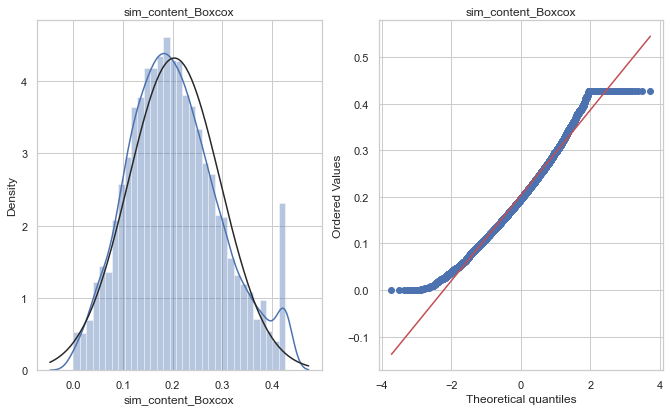

In [143]:
for i in ['sim_content']:
    df12[i+'_log']=np.log1p(df12[i])
    plot_data(df12,i+'_log')
    
   # df12[i+'_reciprocal']=1/df12[i]
   # plot_data(df12,i+'_reciprocal')
    
    df12[i+'_sqr_root']=df12[i]**(1/2)
    plot_data(df12,i+'_sqr_root')
    
    df12[i+'_sqr']=df12[i]**2
    plot_data(df12,i+'_sqr')
    
    df12[i+'_exponential']=df12[i]**(1/1.2)
    plot_data(df12,i+'_exponential')
    
    df12[i+'_Boxcox']=boxcox1p(df12[i],0.25)
    plot_data(df12,i+'_Boxcox')

In [ ]:
# boxcox transformation is better for sim_content
# we gonna add it to df11

skewness is 0.3704793005558056


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


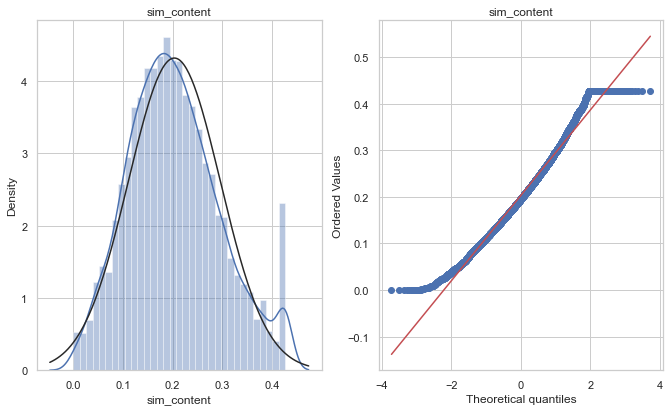

In [144]:
df11['sim_content']=boxcox1p(df11['sim_content'],0.25)
plot_data(df11,'sim_content')

In [145]:
# 'sim_comment'
df12 =df11.copy()

skewness is 0.25957758213458343


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


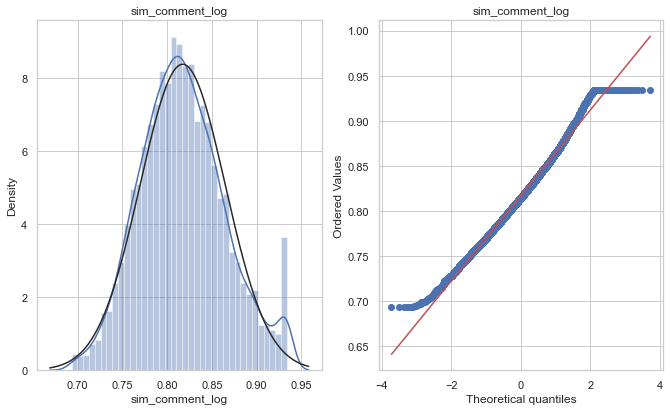

skewness is -0.3626743764377238


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


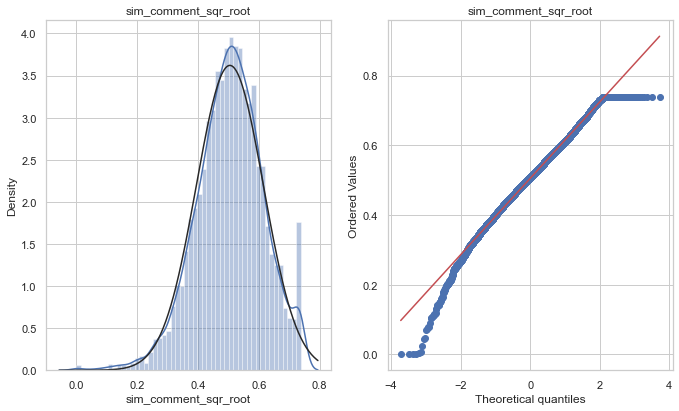

skewness is 1.36388432677789


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


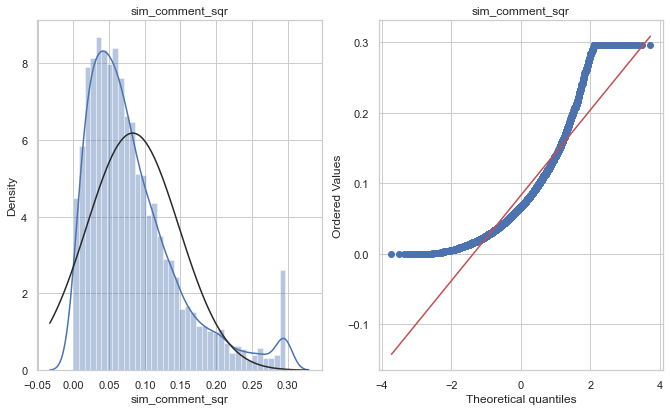

skewness is 0.1803275829622937


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


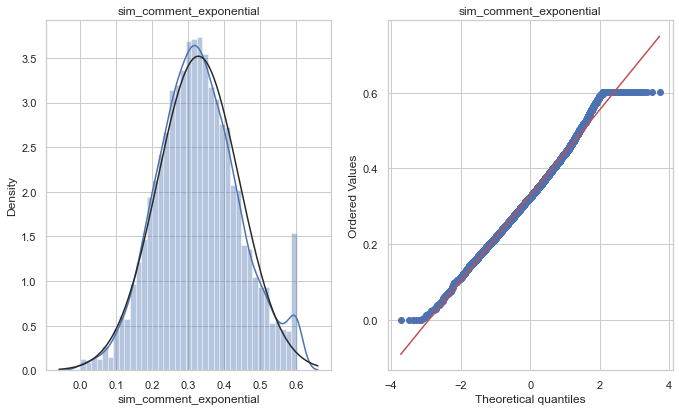

skewness is 0.21584728981232795


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


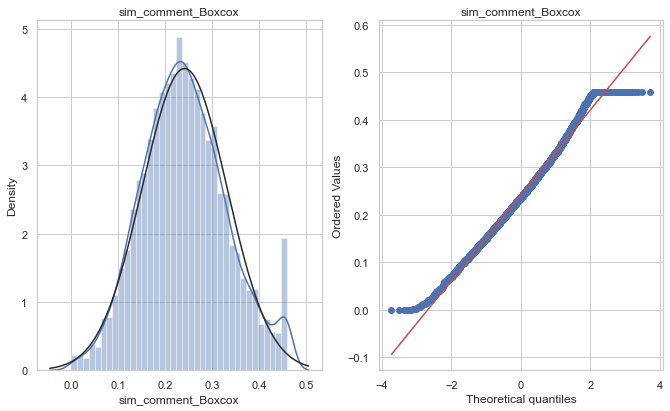

In [146]:
for i in ['sim_comment']:
    df12[i+'_log']=np.log1p(df12[i]+1)
    plot_data(df12,i+'_log')
    
    #df12[i+'_reciprocal']=1/df12[i]
    #plot_data(df12,i+'_reciprocal')
    
    df12[i+'_sqr_root']=df12[i]**(1/2)
    plot_data(df12,i+'_sqr_root')
    
    df12[i+'_sqr']=df12[i]**2
    plot_data(df12,i+'_sqr')
    
    df12[i+'_exponential']=df12[i]**(1/1.2)
    plot_data(df12,i+'_exponential')
    
    df12[i+'_Boxcox']=boxcox1p(df12[i],0.25)
    plot_data(df12,i+'_Boxcox')

In [ ]:
# boxcox is better for sin_comment
# we gonna add it to df11

skewness is 0.21584728981232795


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


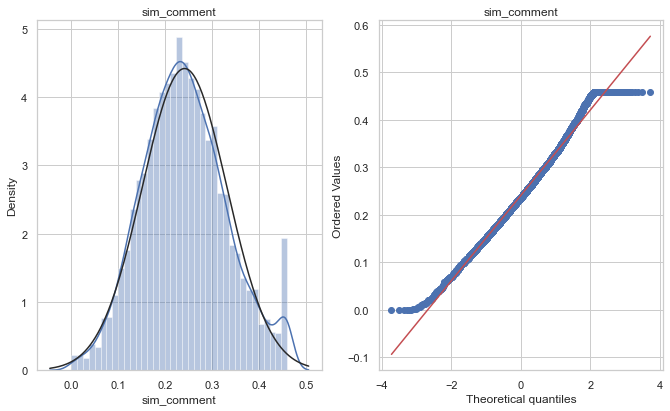

In [147]:
df11['sim_comment']=boxcox1p(df12['sim_comment'],0.25)
plot_data(df11,'sim_comment')

In [148]:
# 'word_count'
df12 = df11.copy()

skewness is 0.271142561025262


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


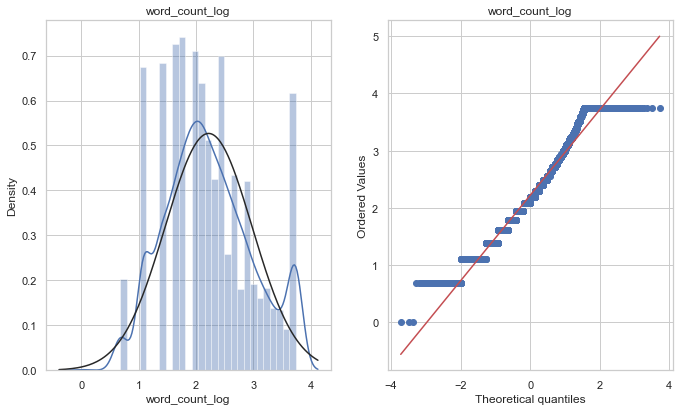

skewness is 1.5481108822442846


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


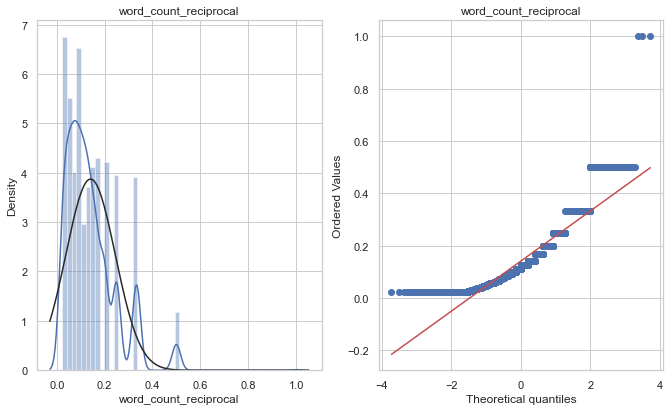

skewness is 1.028059625494898


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


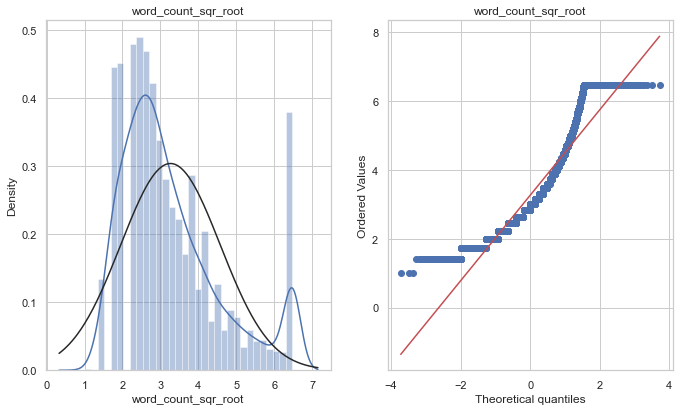

skewness is 2.453359892595441


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


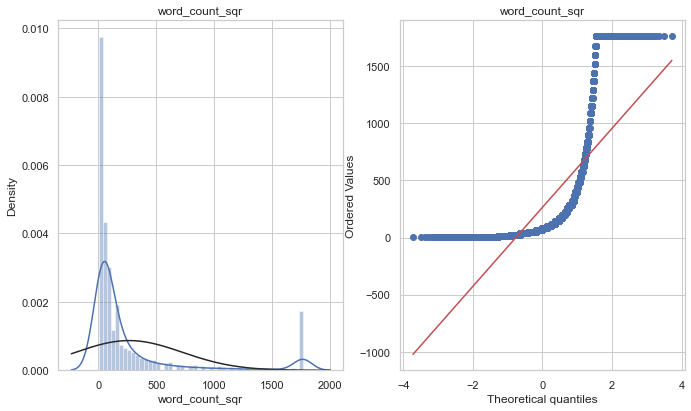

skewness is 1.4610925629701


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


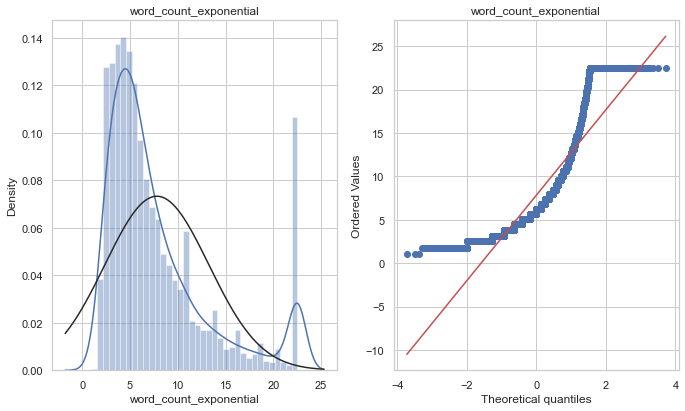

skewness is 0.021030709069451103


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


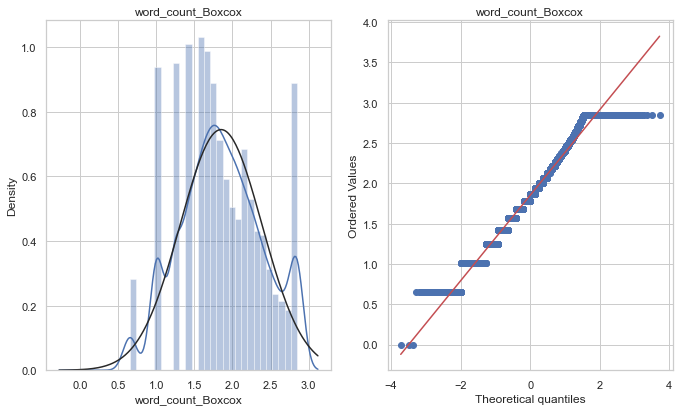

In [149]:
for i in ['word_count']:
    df12[i+'_log']=np.log(df12[i])
    plot_data(df12,i+'_log')
    
    df12[i+'_reciprocal']=1/df12[i]
    plot_data(df12,i+'_reciprocal')
    
    df12[i+'_sqr_root']=df12[i]**(1/2)
    plot_data(df12,i+'_sqr_root')
    
    df12[i+'_sqr']=df12[i]**2
    plot_data(df12,i+'_sqr')
    
    df12[i+'_exponential']=df12[i]**(1/1.2)
    plot_data(df12,i+'_exponential')
    
    df12[i+'_Boxcox'],_=stat.boxcox(df12[i])
    plot_data(df12,i+'_Boxcox')

In [ ]:
# Boxcox transformation is better for word_count
# we gonna add it to df11

skewness is 0.021030709069451103


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


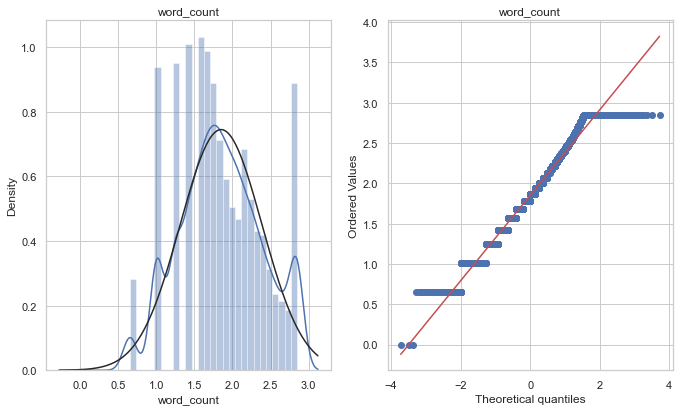

In [150]:
df11['word_count'],_=stat.boxcox(df11['word_count'])
plot_data(df11,'word_count')

In [151]:
# 'length_of_comment'
df12 = df11.copy()

skewness is -0.09175936406472406


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


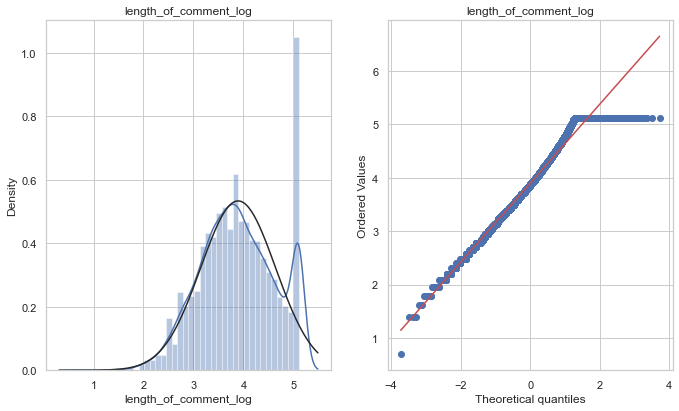

skewness is 3.5064188265022014


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


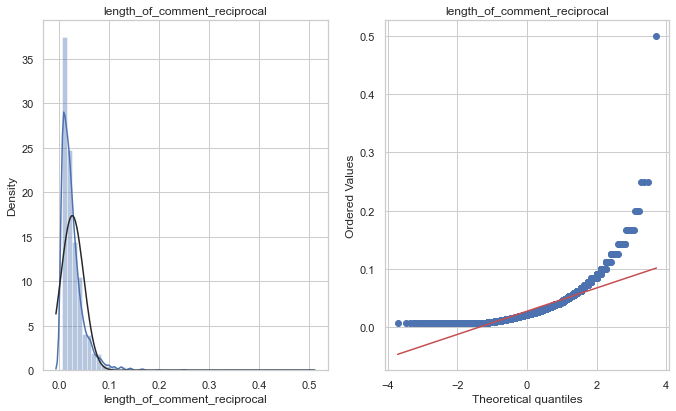

skewness is 0.5779696791790843


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


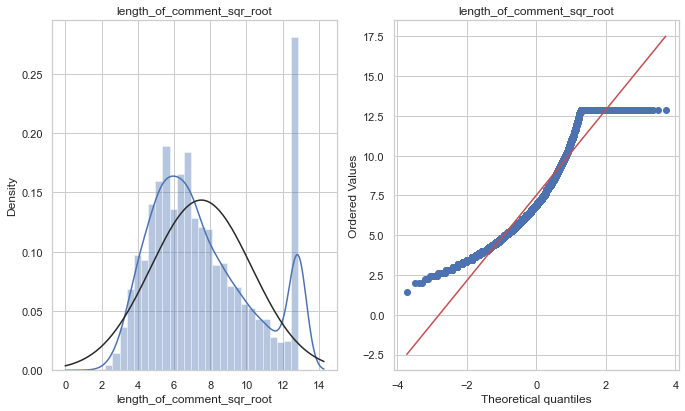

skewness is 1.642386639461854


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


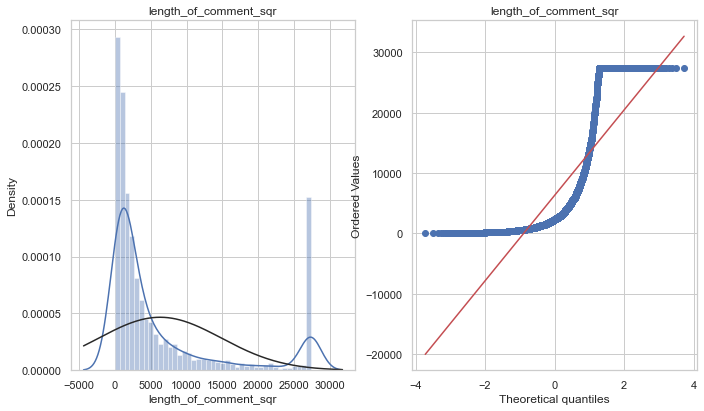

skewness is 0.9143051878676082


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


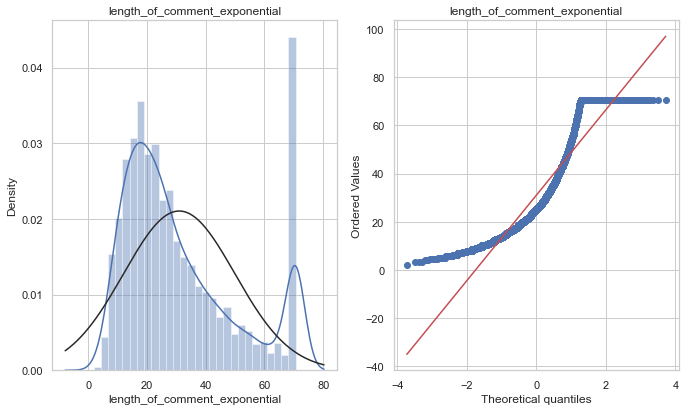

skewness is 0.29602485533182105


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


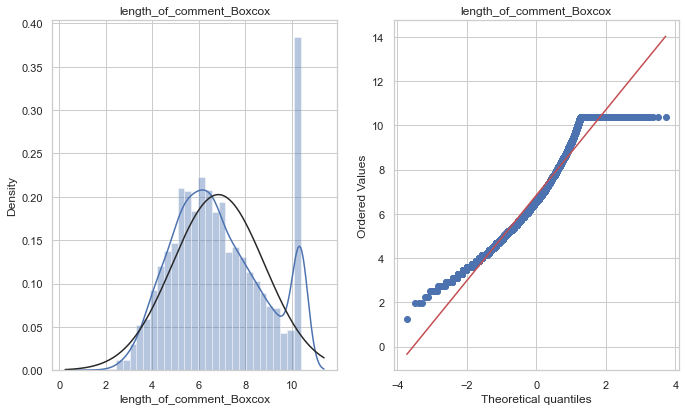

In [152]:
for i in ['length_of_comment']:
    df12[i+'_log']=np.log(df12[i])
    plot_data(df12,i+'_log')
    
    df12[i+'_reciprocal']=1/df12[i]
    plot_data(df12,i+'_reciprocal')
    
    df12[i+'_sqr_root']=df12[i]**(1/2)
    plot_data(df12,i+'_sqr_root')
    
    df12[i+'_sqr']=df12[i]**2
    plot_data(df12,i+'_sqr')
    
    df12[i+'_exponential']=df12[i]**(1/1.2)
    plot_data(df12,i+'_exponential')
    
    df12[i+'_Boxcox']=boxcox1p(df12[i],0.25)
    plot_data(df12,i+'_Boxcox')

In [ ]:
# Boxcox transformation is better for length_of_comment
# we gonna add it to df11

skewness is -0.09175936406472406


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


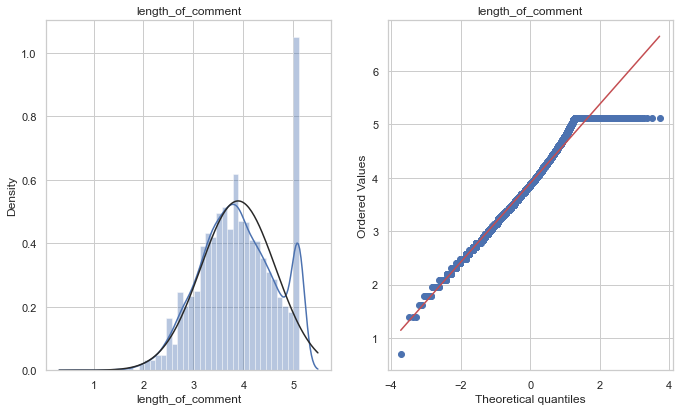

In [153]:
df11['length_of_comment']=np.log(df11['length_of_comment'])
plot_data(df11,'length_of_comment')

In [156]:
# 'post_coment_gap'
df12 = df11.copy()

skewness is -0.6227360523673259


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


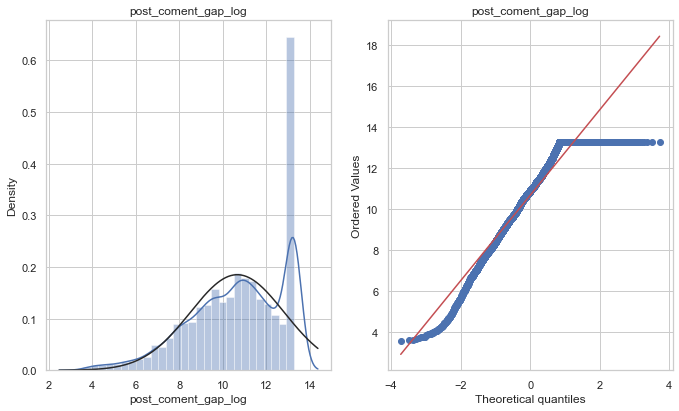

skewness is 9.066254871576607


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


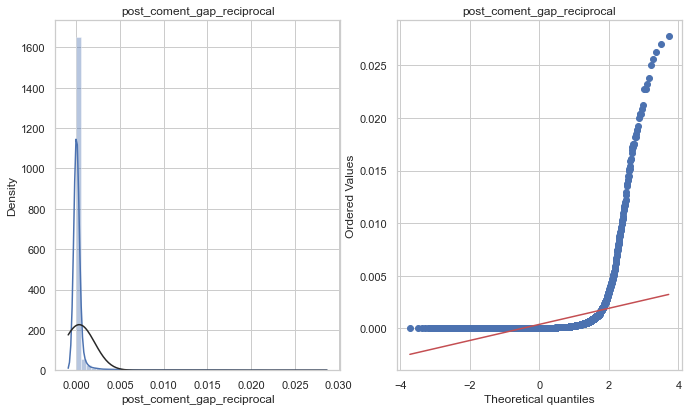

skewness is 0.6411188671465432


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


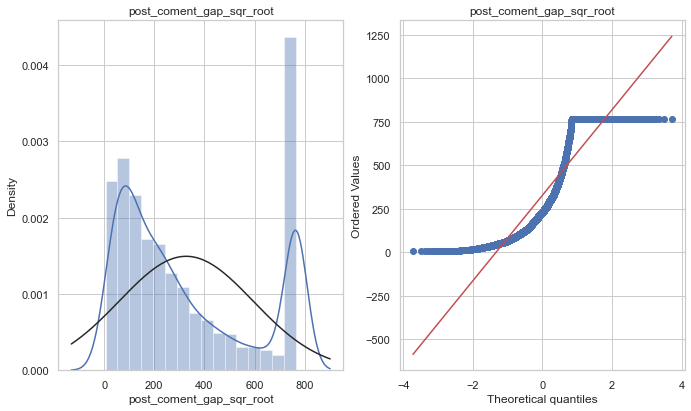

skewness is 1.2780948302589312


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


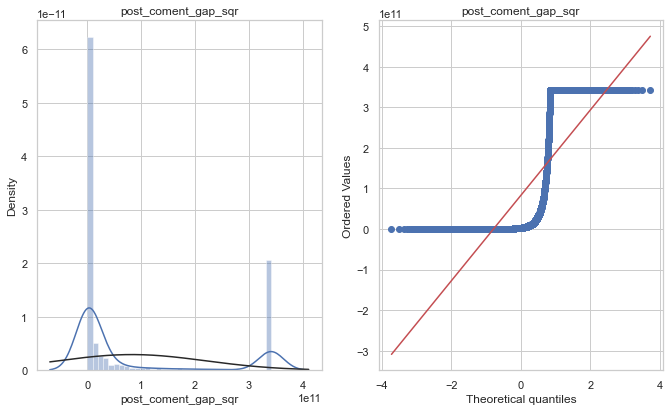

skewness is 0.9426763782584168


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


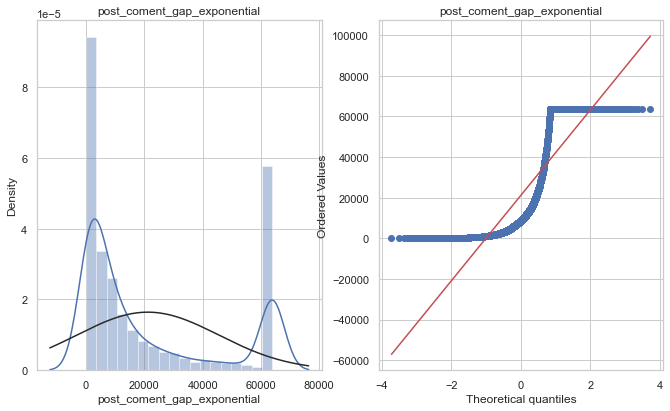

skewness is -0.09888239968937702


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


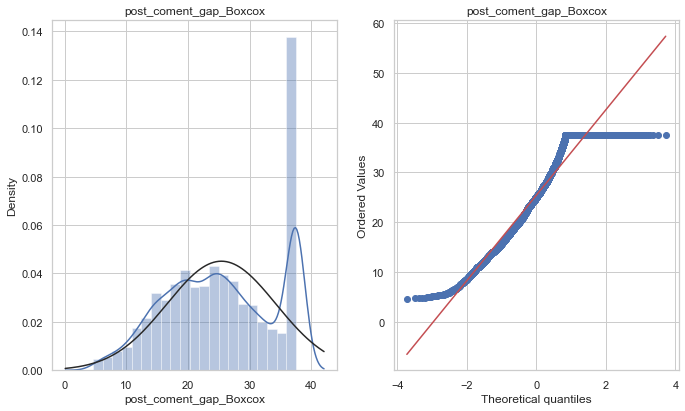

In [157]:
for i in ['post_coment_gap']:
    df12[i+'_log']=np.log(df12[i])
    plot_data(df12,i+'_log')
    
    df12[i+'_reciprocal']=1/df12[i]
    plot_data(df12,i+'_reciprocal')
    
    df12[i+'_sqr_root']=df12[i]**(1/2)
    plot_data(df12,i+'_sqr_root')
    
    df12[i+'_sqr']=df12[i]**2
    plot_data(df12,i+'_sqr')
    
    df12[i+'_exponential']=df12[i]**(1/1.2)
    plot_data(df12,i+'_exponential')
    
    df12[i+'_Boxcox'],_=stat.boxcox(df12[i])
    plot_data(df12,i+'_Boxcox')

In [ ]:
# Boxcox transformation is better for post_coment_gap
# we gonna add it to df11

skewness is -0.09888239968937702


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


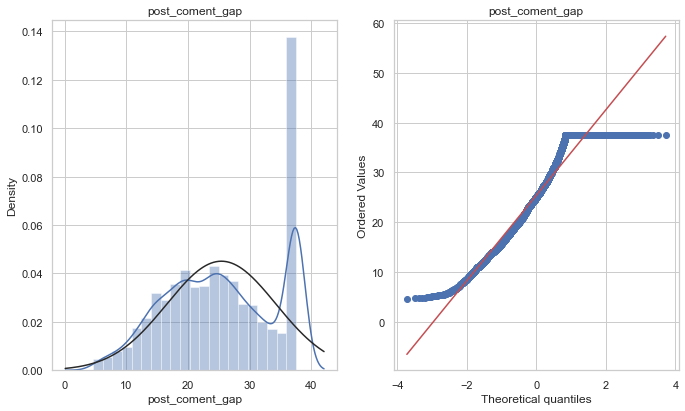

In [158]:
df11['post_coment_gap'],_=stat.boxcox(df11['post_coment_gap'])
plot_data(df11,'post_coment_gap')

In [ ]:
# features distribution data tranformed to a normal distribution ( not completely but closely)

In [159]:
df11.head()

,cid,sim_content,sim_comment,word_count,duplicate_word_ratio,no_of_sentences,length_of_comment,num_of_punctuations,is_period_sequence,post_coment_gap,black_word_count,is_link,is_youtube_link,is_number,comment_duplication,is_spam
0,Ugy769vKgLmxLndJ8sx4AaABAg,0.179708,0.239557,1.866549,0.0000,1,3.850148,0.0,0,16.056023,0.111111,0,0,0,0.0,0
1,UgwIQMX2rs9U9qI06_N4AaABAg,0.150545,0.184270,1.866549,0.0000,2,4.077537,2.0,0,37.516381,0.000000,0,0,0,0.0,0
2,UgwCIdg5Z-jirXS6Kgl4AaABAg,0.167696,0.191896,2.260334,0.0625,3,4.499810,4.0,0,37.516381,0.125000,1,1,0,0.0,1
3,UgwZsA5gVoDLrZeMRBl4AaABAg,0.228679,0.217009,1.683387,0.0000,1,3.610918,0.0,0,37.516381,0.000000,0,0,0,0.0,0
4,UgxoAeJzzamd3kqBpiF4AaABAg,0.105110,0.125598,2.122198,0.0000,2,4.369448,4.0,1,37.516381,0.076923,1,1,0,0.0,1


In [160]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6967 entries, 0 to 6966
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cid                   6967 non-null   object 
 1   sim_content           6967 non-null   float64
 2   sim_comment           6967 non-null   float64
 3   word_count            6967 non-null   float64
 4   duplicate_word_ratio  6967 non-null   float64
 5   no_of_sentences       6967 non-null   int64  
 6   length_of_comment     6967 non-null   float64
 7   num_of_punctuations   6967 non-null   float64
 8   is_period_sequence    6967 non-null   int64  
 9   post_coment_gap       6967 non-null   float64
 10  black_word_count      6967 non-null   float64
 11  is_link               6967 non-null   int64  
 12  is_youtube_link       6967 non-null   int64  
 13  is_number             6967 non-null   int64  
 14  comment_duplication   6967 non-null   float64
 15  is_spam              

In [ ]:
#df11['no_of_sentences'] = df11['no_of_sentences'].astype(str)

In [ ]:
#df11['num_of_punctuations'] = df11['num_of_punctuations'].astype(str)

In [ ]:
#df11['is_period_sequence'] = df11['is_period_sequence'].astype(str)

In [ ]:
#df11['is_link'] = df11['is_link'].astype(str)

In [ ]:
#df11['is_youtube_link'] = df11['is_youtube_link'].astype(str)

In [ ]:
#df11['is_number'] = df11['is_number'].astype(str)

In [161]:
continous_features

['sim_content',
 'sim_comment',
 'duplicate_word_ratio',
 'post_coment_gap',
 'black_word_count',
 'comment_duplication']

In [162]:
df11 = df11.drop('cid',axis=1)

In [ ]:
#new_df = pd.get_dummies(df11,drop_first=True)

In [163]:
pd.set_option('display.max_columns', None)

In [164]:
df11.head(3)

,sim_content,sim_comment,word_count,duplicate_word_ratio,no_of_sentences,length_of_comment,num_of_punctuations,is_period_sequence,post_coment_gap,black_word_count,is_link,is_youtube_link,is_number,comment_duplication,is_spam
0,0.179708,0.239557,1.866549,0.0000,1,3.850148,0.0,0,16.056023,0.111111,0,0,0,0.0,0
1,0.150545,0.184270,1.866549,0.0000,2,4.077537,2.0,0,37.516381,0.000000,0,0,0,0.0,0
2,0.167696,0.191896,2.260334,0.0625,3,4.499810,4.0,0,37.516381,0.125000,1,1,0,0.0,1


In [165]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6967 entries, 0 to 6966
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sim_content           6967 non-null   float64
 1   sim_comment           6967 non-null   float64
 2   word_count            6967 non-null   float64
 3   duplicate_word_ratio  6967 non-null   float64
 4   no_of_sentences       6967 non-null   int64  
 5   length_of_comment     6967 non-null   float64
 6   num_of_punctuations   6967 non-null   float64
 7   is_period_sequence    6967 non-null   int64  
 8   post_coment_gap       6967 non-null   float64
 9   black_word_count      6967 non-null   float64
 10  is_link               6967 non-null   int64  
 11  is_youtube_link       6967 non-null   int64  
 12  is_number             6967 non-null   int64  
 13  comment_duplication   6967 non-null   float64
 14  is_spam               6967 non-null   int64  
dtypes: float64(9), int64(

In [166]:
df11.columns

Index(['sim_content', 'sim_comment', 'word_count', 'duplicate_word_ratio',
       'no_of_sentences', 'length_of_comment', 'num_of_punctuations',
       'is_period_sequence', 'post_coment_gap', 'black_word_count', 'is_link',
       'is_youtube_link', 'is_number', 'comment_duplication', 'is_spam'],
      dtype='object')

In [167]:
df11.to_csv('models.csv')